## Importing Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv("download (6).csv")


## Random Forest using all features

In order to find the most important features for our staging of breast cancer prognosis, this cell sets upand evaluates a Random Forest classifier. The process involves preparing the data, encoding categorical features, handling missing values, splitting the dataset, training the model, and evaluating its performance on a test set. This initial evaluation with all available features will help establish a baseline and identify which features are most influential in predicting the stages of breast cancer.

In [2]:
target = 'Stage'
features = df.columns.drop(target)

le = LabelEncoder()
for col in features:
    if df[col].dtype == 'object':  
        df[col] = le.fit_transform(df[col].astype(str))

X = df[features].copy()
y = df[target]
X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

     Stage I       0.73      1.00      0.85        11
    Stage IA       1.00      0.81      0.89        21
    Stage II       1.00      0.00      0.00         3
   Stage IIA       0.94      1.00      0.97        58
   Stage IIB       0.97      0.94      0.96        35
  Stage IIIA       0.76      1.00      0.87        13
  Stage IIIC       1.00      0.43      0.60         7

    accuracy                           0.91       148
   macro avg       0.91      0.74      0.73       148
weighted avg       0.93      0.91      0.90       148



## Feature Analysis

To refine our understanding of breast cancer prognosis, this segment of analysis focuses on the critical task of feature evaluation. After setting up our data, encoding categorical variables, and handling missing values, we meticulously trained a Random Forest classifier with the aim of uncovering which features significantly influence the staging of breast cancer. This step is crucial for identifying impactful factors and potentially discarding redundant or less informative features, which can streamline future modeling efforts and enhance predictive accuracy.


In [10]:
import matplotlib.pyplot as plt
import numpy as np
target = 'Stage'
features = df.columns.drop(target)

# Optionally, encode categorical variables
le = LabelEncoder()
for col in features:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Split the data
X = df[features].copy()
y = df[target]
X.fillna(X.mean(), inplace=True)  # handle missing values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

print("Feature ranking:")
print("_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_\n")
for f in range(X_train.shape[1]):
    if feature_importances[indices[f]]  !=0:

        print(f"{features[indices[f]]}: {feature_importances[indices[f]]:.4f}")



Feature ranking:
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_

paper_pathologic_stage: 0.1765
ajcc_pathologic_n: 0.1694
ajcc_pathologic_t: 0.0952
days_to_collection: 0.0293
paper_days_to_last_followup: 0.0234
year_of_diagnosis: 0.0224
treatments: 0.0223
initial_weight: 0.0218
sample_id: 0.0210
days_to_birth: 0.0207
pathology_report_uuid: 0.0207
demographic_id: 0.0206
paper_days_to_birth: 0.0205
diagnosis_id: 0.0202
Unnamed: 0: 0.0199
age_at_diagnosis: 0.0186
sample_submitter_id: 0.0184
paper_patient: 0.0181
patient: 0.0176
paper_age_at_initial_pathologic_diagnosis: 0.0175
bcr_patient_barcode: 0.0172
barcode: 0.0171
submitter_id: 0.0166
sample: 0.0157
age_at_index: 0.0148
sites_of_involvement: 0.0143
paper_PARADIGM.Clusters: 0.0101
paper_Mutation.Clusters: 0.0093
primary_diagnosis: 0.0082
paper_CNV.Clusters: 0.0082
paper_BRCA_Subtype_PAM50: 0.0078
morphology: 0.0076
ajcc_pathologic_m: 0.0065
method_of_diagnosis: 0.0060
paper_miRNA.Clusters: 0.0060
paper_mRNA.Clusters: 0.0055
race: 0.0051
p

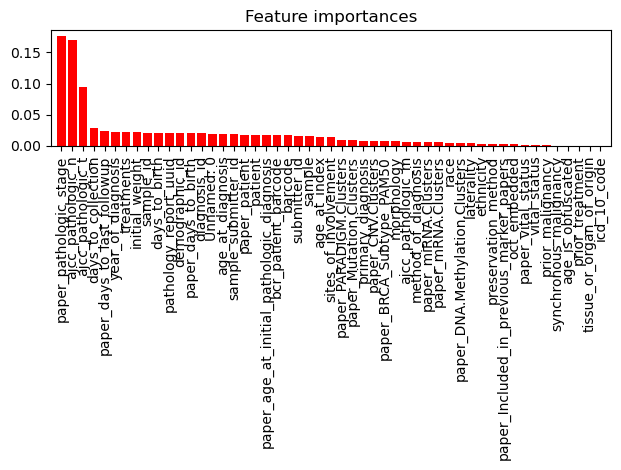

In [11]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(non_zero_indices)), [feature_importances[i] for i in non_zero_indices], color="r", align="center")
plt.xticks(range(len(non_zero_indices)), [features[i] for i in non_zero_indices], rotation=90)
plt.xlim([-1, len(non_zero_indices)])
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Result after removing non important features

In [8]:
target = 'Stage'
features = ['paper_pathologic_stage', 'ajcc_pathologic_n', 'ajcc_pathologic_t', 'days_to_collection', 
            'paper_days_to_last_followup', 'year_of_diagnosis', 'treatments', 'initial_weight', 'sample_id', 
            'days_to_birth', 'pathology_report_uuid', 'demographic_id', 'paper_days_to_birth', 'diagnosis_id', 
            'Unnamed: 0', 'age_at_diagnosis', 'sample_submitter_id', 'paper_patient', 'patient', 
            'paper_age_at_initial_pathologic_diagnosis', 'bcr_patient_barcode', 'barcode', 'submitter_id', 
            'sample', 'age_at_index', 'sites_of_involvement', 'paper_PARADIGM.Clusters', 'paper_Mutation.Clusters', 
            'primary_diagnosis', 'paper_CNV.Clusters', 'paper_BRCA_Subtype_PAM50', 'morphology', 'ajcc_pathologic_m', 
            'method_of_diagnosis', 'paper_miRNA.Clusters', 'paper_mRNA.Clusters', 'race', 'paper_DNA.Methylation.Clusters', 
            'laterality', 'ethnicity', 'preservation_method', 'paper_Included_in_previous_marker_papers', 
            'oct_embedded', 'paper_vital_status', 'vital_status', 'prior_malignancy', 'synchronous_malignancy', 
            'age_is_obfuscated', 'prior_treatment', 'tissue_or_organ_of_origin', 'icd_10_code']

In [9]:
le = LabelEncoder()
df[features] = df[features].apply(lambda col: le.fit_transform(col.astype(str)))

X = df[features].copy()
y = df[target]

X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

     Stage I       0.79      1.00      0.88        11
    Stage IA       1.00      0.86      0.92        21
    Stage II       1.00      0.00      0.00         3
   Stage IIA       0.94      1.00      0.97        58
   Stage IIB       0.97      0.94      0.96        35
  Stage IIIA       0.76      1.00      0.87        13
  Stage IIIC       1.00      0.43      0.60         7

    accuracy                           0.92       148
   macro avg       0.92      0.75      0.74       148
weighted avg       0.93      0.92      0.91       148



## Grid search to find best result

In [8]:
le = LabelEncoder()
df[features] = df[features].apply(lambda col: le.fit_transform(col.astype(str)))

X = df[features].copy()
y = df[target]

X.fillna(X.mean(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("best parameters:", grid_search.best_params_)
print("best score:", grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\pc\anaconda3\envs\image_classification\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
best score: 0.8693032015065913
              precision    recall  f1-score   support

     Stage I       0.85      1.00      0.92        11
    Stage IA       1.00      0.90      0.95        21
    Stage II       1.00      0.00      0.00         3
   Stage IIA       0.88      0.97      0.92        58
   Stage IIB       0.94      0.86      0.90        35
  Stage IIIA       0.76      1.00      0.87        13
  Stage IIIC       1.00      0.43      0.60         7

    accuracy                           0.89       148
   macro avg       0.92      0.74      0.74       148
weighted avg       0.90      0.89      0.88       148



### running random Forest based on following Grid Search

In [10]:
from sklearn.metrics import accuracy_score
le = LabelEncoder()
df[features] = df[features].apply(lambda col: le.fit_transform(col.astype(str)))

X = df[features].copy()
y = df[target]

X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=300, random_state=42, min_samples_split= 5, min_samples_leaf=1, max_depth=10, bootstrap=True )
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy}\n\n")
print(classification_report(y_test, y_pred, zero_division=1))

Overall Accuracy: 0.8918918918918919


              precision    recall  f1-score   support

     Stage I       0.85      1.00      0.92        11
    Stage IA       1.00      0.90      0.95        21
    Stage II       1.00      0.00      0.00         3
   Stage IIA       0.88      0.97      0.92        58
   Stage IIB       0.94      0.86      0.90        35
  Stage IIIA       0.76      1.00      0.87        13
  Stage IIIC       1.00      0.43      0.60         7

    accuracy                           0.89       148
   macro avg       0.92      0.74      0.74       148
weighted avg       0.90      0.89      0.88       148



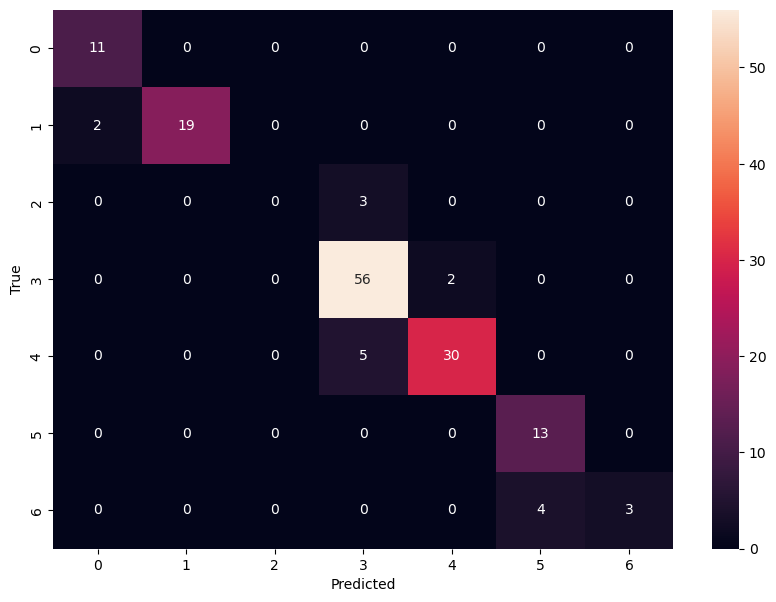

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

correlation between stages and features